In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### 벡터와 행렬
x = np.array([1,2,3])
x.__class__
x.shape
x.ndim

1

In [3]:
W = np.array([[1,2,3],[4,5,6]])
W.shape
W.ndim

2

In [4]:
### 행렬의 원소별 연산
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])

W + X
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [5]:
### 브로드캐스트
A = np.array([[1,2],[3,4]])
A * 10

array([[10, 20],
       [30, 40]])

In [6]:
A = np.array([[1,2],[3,4]])
b = np.array([10,20])
A * b

array([[10, 40],
       [30, 80]])

In [7]:
### 벡터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])

np.dot(a,b)

32

In [8]:
### 행렬의 곱
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

np.matmul(A, B)

array([[19, 22],
       [43, 50]])

In [9]:
### 신경망 추론 전체 그림 (미니배치 : 10개)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10,2)

h = np.matmul(x, W1) + b1

In [10]:
b1   # b1은 브로드캐스트해서 계산 진행

array([-1.01777411,  0.47770236,  0.65765058, -0.55844554])

In [11]:
### 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
a = sigmoid(h)
a

array([[0.71473595, 0.8715347 , 0.84021718, 0.69924358],
       [0.19331954, 0.14366813, 0.9349166 , 0.88715011],
       [0.3898927 , 0.37804856, 0.9267769 , 0.87418646],
       [0.48939291, 0.65183128, 0.85980436, 0.73181143],
       [0.36356337, 0.74621499, 0.64534994, 0.35070413],
       [0.00847275, 0.26795682, 0.06008949, 0.00547727],
       [0.58764715, 0.20515812, 0.99003918, 0.99083026],
       [0.0764217 , 0.50903479, 0.30046987, 0.06924827],
       [0.38906002, 0.65824209, 0.77310776, 0.55314207],
       [0.63626715, 0.40223779, 0.97793119, 0.97416212]])

In [13]:
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

s = np.matmul(a, W2) + b2

In [14]:
x = np.random.randn(10,2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)

h = np.matmul(x, W1) + b1
a = sigmoid(h)
s = np.matmul(a, W2) + b2
s

array([[-2.90564875, -2.28525915, -2.35849492],
       [-3.65859242, -2.80563181, -2.28486729],
       [-3.03842736, -2.28587715, -2.43678774],
       [-3.16272238, -2.74924239, -2.11653869],
       [-3.62073646, -2.50604956, -2.52330651],
       [-3.29842684, -2.71794532, -2.19619002],
       [-2.51993909, -1.66423333, -2.78384   ],
       [-3.52130223, -1.86614681, -3.15609608],
       [-2.55938261, -1.58255501, -2.87774024],
       [-3.58439877, -2.4724103 , -2.53950937]])

In [15]:
### 시그모이드 계층 구현
class Sigmoid:
    def __init__(self):
        self.params = []
        
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [16]:
### Affine 계층 구현
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

In [17]:
### x -> Affine -> sigmoid -> Affine -> s
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I = input_size
        H = hidden_size
        O = output_size
        
        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)
        
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
        
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [18]:
x = np.random.randn(10,2)
model = TwoLayerNet(input_size=2, hidden_size=4, output_size=3)
s = model.predict(x)
s

array([[ 3.03583124,  2.75664768,  0.01748588],
       [ 2.63399349,  2.65712121,  0.25288871],
       [ 3.37371541,  2.36318797, -0.3737127 ],
       [ 2.83494724,  2.55892002,  0.08189891],
       [ 3.25597168,  2.24610566, -0.27996283],
       [ 3.21680642,  2.07539846, -0.31668182],
       [ 3.20158517,  1.98583545, -0.34582384],
       [ 2.22571553,  2.00611666,  0.23321277],
       [ 3.09950946,  2.72065346, -0.02721322],
       [ 2.70004199,  2.66926375,  0.20722717]])

In [19]:
def softmax(x):
    if x.ndim == 1:
        x = x - np.max(x)
        return np.exp(x) / np.sum(np.exp(x))
    elif x.ndim == 2:
        x = x - np.max(x, axis=1, keepdims=True)
        x = np.exp(x)
        return x / np.sum(x, axis=1, keepdims=True)

In [20]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1,-1)
        y = y.reshape(1,-1)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/batch_size

In [21]:
class SoftmaxWithLoss:
    def __init__(self):
        self.y = None
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)
            
        loss = cross_entropy_error(self.y, self.t)
        return loss

In [22]:
x = np.array([[1,2,1],[0,3,4],[1,5,6]])
y = softmax(x)

t = np.array([[0,1,0],[0,1,0],[0,0,1]])
cross_entropy_error(y,t)

0.7320606988675182

In [23]:
### Repeat 노드
D, N = 8, 7
x = np.random.randn(1,D)
y = np.repeat(x, N, axis=0)
y

array([[-0.19527577, -1.69689629,  1.1606778 , -1.38567703,  1.09500385,
        -0.31369197, -0.76049238,  0.31754174],
       [-0.19527577, -1.69689629,  1.1606778 , -1.38567703,  1.09500385,
        -0.31369197, -0.76049238,  0.31754174],
       [-0.19527577, -1.69689629,  1.1606778 , -1.38567703,  1.09500385,
        -0.31369197, -0.76049238,  0.31754174],
       [-0.19527577, -1.69689629,  1.1606778 , -1.38567703,  1.09500385,
        -0.31369197, -0.76049238,  0.31754174],
       [-0.19527577, -1.69689629,  1.1606778 , -1.38567703,  1.09500385,
        -0.31369197, -0.76049238,  0.31754174],
       [-0.19527577, -1.69689629,  1.1606778 , -1.38567703,  1.09500385,
        -0.31369197, -0.76049238,  0.31754174],
       [-0.19527577, -1.69689629,  1.1606778 , -1.38567703,  1.09500385,
        -0.31369197, -0.76049238,  0.31754174]])

In [24]:
dy = np.random.randn(N, D)
dx = np.sum(dy , axis=0, keepdims=True)
dx

array([[ 6.85232936, -0.59459003,  1.66368655,  5.50574024,  1.5995701 ,
        -0.91740431, -1.22530284, -4.109085  ]])

In [25]:
### Sum 노드
D, N = 8, 7
x = np.random.randn(D, N)
y = np.sum(x, axis=0, keepdims=True)

In [26]:
dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)
dx

array([[-0.18366475,  1.28160434,  1.32500643, -1.04314371,  0.39642564,
        -1.30856051, -1.24207164, -0.6100977 ],
       [-0.18366475,  1.28160434,  1.32500643, -1.04314371,  0.39642564,
        -1.30856051, -1.24207164, -0.6100977 ],
       [-0.18366475,  1.28160434,  1.32500643, -1.04314371,  0.39642564,
        -1.30856051, -1.24207164, -0.6100977 ],
       [-0.18366475,  1.28160434,  1.32500643, -1.04314371,  0.39642564,
        -1.30856051, -1.24207164, -0.6100977 ],
       [-0.18366475,  1.28160434,  1.32500643, -1.04314371,  0.39642564,
        -1.30856051, -1.24207164, -0.6100977 ],
       [-0.18366475,  1.28160434,  1.32500643, -1.04314371,  0.39642564,
        -1.30856051, -1.24207164, -0.6100977 ],
       [-0.18366475,  1.28160434,  1.32500643, -1.04314371,  0.39642564,
        -1.30856051, -1.24207164, -0.6100977 ]])

In [27]:
### MatMul 노드
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW   # 깊은 복사 : 메모리 주소 고정
        return dx, dW

In [28]:
### 시그모이드 계층 구현
class Sigmoid:
    def __init__(self):
        self.params = []
        self.grads = []
        self.out = None
    
    def forward(self, x):
        out = 1 / (np.exp(-x) + 1)
        self.out = out
        return out
        
    def backward(self, dout):
        return dout * self.out * (1.0 - self.out)

In [29]:
### Affine 계층 구현
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

In [30]:
### Affine With Loss 계층 구현
class SoftmaxWithLoss:
    def __init__(self):
        self.params = []
        self.grads = []
        self.t = None
        self.y = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)
            
        loss = cross_entropy_error(self.y, self.t)
        return loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        
        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size
        
        return dx

In [31]:
y = np.array([[2.3,1.1,0.8],[0.5,3.2,2.0],[2.8,3.5,1.1]])
t = np.array([[1,0,0],[0,0,1],[0,1,0]])
if t.size == y.size:
    t = t.argmax(axis=1)
    
loss = cross_entropy_error(y,t)

batch_size = t.shape[0]

dx = y.copy() # y값 바꿔도 dx값 안바뀜
dx[np.arange(batch_size), t] -= 1
dx *= 1
dx, dx / batch_size

(array([[1.3, 1.1, 0.8],
        [0.5, 3.2, 1. ],
        [2.8, 2.5, 1.1]]),
 array([[0.43333333, 0.36666667, 0.26666667],
        [0.16666667, 1.06666667, 0.33333333],
        [0.93333333, 0.83333333, 0.36666667]]))

In [32]:
### SGD 구현
class SGD:
    def __init__(self, lr=0.001):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [33]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

In [34]:
### 비선형 데이터 학습
x, t = spiral.load_data()
x.shape, t.shape

((300, 2), (300, 3))

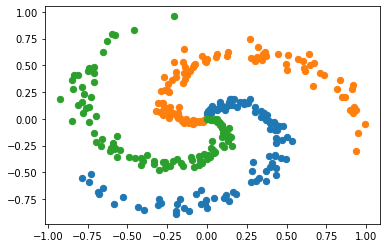

In [35]:
cls_num = 100
N = 100

for i in range(cls_num):
    plt.scatter(x[i*N:i*N+100,0], x[i*N:i*N+100,1], s=40)
plt.show()

In [36]:
### 2층 신경망 구현
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I = input_size
        H = hidden_size
        O = output_size
        
        W1 = 0.01 * np.random.randn(I,H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H,O)
        b2 = np.zeros(O)
        
        self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
        self.loss_layer = SoftmaxWithLoss()
        
        self.params = []
        self.grads = []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

In [37]:
### 학습용 코드 1 : 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [38]:
### 학습용 코드 2 : 데이터 읽기 & 모델, 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [39]:
### 학습용 코드 3 : 매개변수 갱신 
data_size = x.shape[0]
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        x_batch = x[iters * batch_size : (iters+1) * batch_size]
        t_batch = t[iters * batch_size : (iters+1) * batch_size]

        loss = model.forward(x_batch, t_batch)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'에폭: {epoch}, 반복: {iters+1}/{max_iters}, 손실: {avg_loss}')
            loss_list.append(avg_loss)
            total_loss = 0
            loss_count = 0

에폭: 0, 반복: 10/10, 손실: 1.1256062166823237
에폭: 1, 반복: 10/10, 손실: 1.1255202354489933
에폭: 2, 반복: 10/10, 손실: 1.1162613752115285
에폭: 3, 반복: 10/10, 손실: 1.1162867078413503
에폭: 4, 반복: 10/10, 손실: 1.1123000112951948
에폭: 5, 반복: 10/10, 손실: 1.1384639824108038
에폭: 6, 반복: 10/10, 손실: 1.1590961883070312
에폭: 7, 반복: 10/10, 손실: 1.1086316143023154
에폭: 8, 반복: 10/10, 손실: 1.1173305676924539
에폭: 9, 반복: 10/10, 손실: 1.1287957712269245
에폭: 10, 반복: 10/10, 손실: 1.1168438089353867
에폭: 11, 반복: 10/10, 손실: 1.108338779101816
에폭: 12, 반복: 10/10, 손실: 1.087614920049946
에폭: 13, 반복: 10/10, 손실: 1.076681386581935
에폭: 14, 반복: 10/10, 손실: 1.0442376735950387
에폭: 15, 반복: 10/10, 손실: 1.034578262633777
에폭: 16, 반복: 10/10, 손실: 0.9572932039643971
에폭: 17, 반복: 10/10, 손실: 0.918385321087945
에폭: 18, 반복: 10/10, 손실: 0.9241491096212101
에폭: 19, 반복: 10/10, 손실: 0.8685139076509193
에폭: 20, 반복: 10/10, 손실: 0.8493807047841541
에폭: 21, 반복: 10/10, 손실: 0.8171629191788113
에폭: 22, 반복: 10/10, 손실: 0.7924414711357767
에폭: 23, 반복: 10/10, 손실: 0.7826646392986113
에폭: 24,

In [40]:
x.shape[0]

300

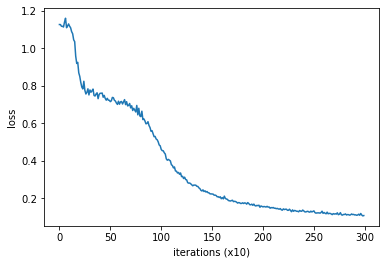

In [41]:
### 학습 결과 그래프
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

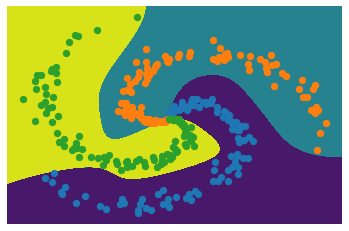

In [42]:
### 경계 영역 그래프
h = 0.001
x_min, x_max = x[:, 0].min()-0.1, x[:, 0].max()+0.1
y_min, y_max = x[:, 1].min()-0.1, x[:, 1].max()+0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')


### 데이터점 그래프
x, t = spiral.load_data()
cls_num = 3
N = 100

for i in range(cls_num):
    plt.scatter(x[i*N:(i+1)*N,0], x[i*N:(i+1)*N, 1], s=40)
plt.show()

In [43]:
import time
from common.util import clip_grads
from common.trainer import remove_duplicate

In [44]:
### trainer 클래스 구현
class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0
        
    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = x.shape[0]
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model = self.model
        optimizer = self.optimizer
        total_loss = 0
        loss_count = 0
        
        start_time = time.time()
        for epoch in range(max_epoch):
            idx = np.random.permutation(data_size)
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                x_batch = x[iters * batch_size : (iters+1) * batch_size]
                t_batch = t[iters * batch_size : (iters+1) * batch_size]

                loss = model.forward(x_batch, t_batch)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)
                
                if max_grad is not None:
                    clip_grads(grads, max_grads)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print(f'에폭: {self.current_epoch + 1}, 반복: {iters+1}/{max_iters}, 시간: {elapsed_time}, 손실: {avg_loss}')
                    self.loss_list.append(float(avg_loss))
                    total_loss = 0
                    loss_count = 0
            self.current_epoch += 1
            
    def plot(self, ylim=None):
        x = np.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel(f'iterations (x{self.eval_interval})')
        plt.ylabel('loss')
        plt.show()

에폭: 1, 반복: 1/10, 시간: 0.00036716461181640625, 손실: 1.0979835927063497
에폭: 2, 반복: 1/10, 시간: 0.0018842220306396484, 손실: 1.1189180749104572
에폭: 3, 반복: 1/10, 시간: 0.003199338912963867, 손실: 1.1299014199094313
에폭: 4, 반복: 1/10, 시간: 0.004403352737426758, 손실: 1.1212650789399152
에폭: 5, 반복: 1/10, 시간: 0.005583286285400391, 손실: 1.1228718231286021
에폭: 6, 반복: 1/10, 시간: 0.0069561004638671875, 손실: 1.1047121736014993
에폭: 7, 반복: 1/10, 시간: 0.008118152618408203, 손실: 1.141305904827527
에폭: 8, 반복: 1/10, 시간: 0.009321212768554688, 손실: 1.1557548646288012
에폭: 9, 반복: 1/10, 시간: 0.010506391525268555, 손실: 1.105871729281462
에폭: 10, 반복: 1/10, 시간: 0.011457204818725586, 손실: 1.1220119486921498
에폭: 11, 반복: 1/10, 시간: 0.012604236602783203, 손실: 1.1244772899987758
에폭: 12, 반복: 1/10, 시간: 0.013652324676513672, 손실: 1.120126909581506
에폭: 13, 반복: 1/10, 시간: 0.014789104461669922, 손실: 1.103876639279867
에폭: 14, 반복: 1/10, 시간: 0.015989303588867188, 손실: 1.0855137810441755
에폭: 15, 반복: 1/10, 시간: 0.017226219177246094, 손실: 1.0792409637174225
에폭: 

에폭: 178, 반복: 1/10, 시간: 0.2038562297821045, 손실: 0.17238063697551492
에폭: 179, 반복: 1/10, 시간: 0.20491313934326172, 손실: 0.17726766553457318
에폭: 180, 반복: 1/10, 시간: 0.20588016510009766, 손실: 0.18940609591442867
에폭: 181, 반복: 1/10, 시간: 0.20690631866455078, 손실: 0.173674700899353
에폭: 182, 반복: 1/10, 시간: 0.20795011520385742, 손실: 0.17582934139101297
에폭: 183, 반복: 1/10, 시간: 0.2089841365814209, 손실: 0.15705710513487184
에폭: 184, 반복: 1/10, 시간: 0.2100820541381836, 손실: 0.17654973515181135
에폭: 185, 반복: 1/10, 시간: 0.21126723289489746, 손실: 0.17828999932023198
에폭: 186, 반복: 1/10, 시간: 0.21245121955871582, 손실: 0.1718019281118341
에폭: 187, 반복: 1/10, 시간: 0.2134263515472412, 손실: 0.1718184650674917
에폭: 188, 반복: 1/10, 시간: 0.2146453857421875, 손실: 0.18361238313455816
에폭: 189, 반복: 1/10, 시간: 0.2158830165863037, 손실: 0.16046685909382388
에폭: 190, 반복: 1/10, 시간: 0.21705913543701172, 손실: 0.1640261350186427
에폭: 191, 반복: 1/10, 시간: 0.2183091640472412, 손실: 0.16843157849451781
에폭: 192, 반복: 1/10, 시간: 0.21981525421142578, 손실: 0.1735312036

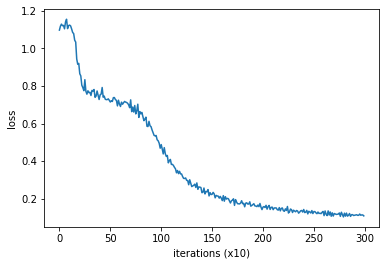

In [45]:
### Trainer 클래스 이용해서 학습
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch=max_epoch, batch_size=batch_size, eval_interval=10)
trainer.plot()

In [46]:
### 비트수 확인
a = np.random.randn(3)
a.dtype   # float64 : 64비트 부동소수점 수

dtype('float64')

In [47]:
### 32비트 부동소수점 수로 변경
b = np.random.randn(3).astype(np.float32)
b.dtype

c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

In [49]:
### 맥은 쿠파이 지원 안함